In [1]:
from gates import *
from states import *
from measurements import *
from utils import *
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange
import cma

Done


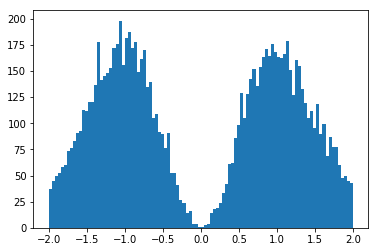

In [2]:
n_photons = 3
state1 = np.zeros(n_photons)
state1[0] = 1.
state2 = np.zeros(n_photons)
state2[0] = 1.
state3 = np.zeros(n_photons)
state3[1] = 1.
state = np.kron(state2, state3)
state = np.kron(state1, state)
data = meas_X_theta(state, 0., 3, n_photons)
plt.hist(data[:,2], bins=100)
print('Done')

# Initialization

In [3]:
n_photons = 6
num_layers = 6
# 1
vacuum_state1 = np.zeros(n_photons)
vacuum_state1[0] = 1.
init_state = vacuum_state1

In [4]:
init_state

array([1., 0., 0., 0., 0., 0.])

In [5]:
def circuit(state, params, n_photons):
    state_ = state
    for i in range(num_layers):
        gate5 = V_gate(params[7*i], 1, 1, n_photons) 
        gate4 = D_gate(params[7*i+1], params[7*i+2], 1, 1, n_photons)
        gate3 = R_gate(params[7*i+3], 1, 1, n_photons) 
        gate2 = S_gate(params[7*i+4], params[7*i+5], 1, 1, n_photons)
        gate1 = R_gate(params[7*i+6], 1, 1, n_photons)
        state_ = np.einsum('jk,k->j', gate1, state_)
        state_ = np.einsum('jk,k->j', gate2, state_)
        state_ = np.einsum('jk,k->j', gate3, state_)
        state_ = np.einsum('jk,k->j', gate4, state_)
        state_ = np.einsum('jk,k->j', gate5, state_)
    
    data = sim_mes_xp(state_, 1, n_photons)
    return data[:,0], data[:,1], state_

def loss_xy(x1, p1):
    H = np.zeros(x1.shape[0], dtype=np.float32)
    dimension = x1.shape[0]
    H = (x1**2/2. + p1**2/2. - 1/2.)**2
    return np.mean(H) + np.std(H)

In [6]:
def func_to_opt(params):
    X, P, _ = circuit(init_state, params, n_photons)
    return loss_xy(X, P)

In [7]:
init_params = np.random.uniform(size=7*num_layers)
es = cma.CMAEvolutionStrategy(init_params, 0.4)

(7_w,15)-aCMA-ES (mu_w=4.5,w_1=34%) in dimension 42 (seed=178920, Mon Jan 27 10:22:55 2020)


In [8]:
es.optimize(func_to_opt,iterations=400)

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     15 1.998013081920738e+00 1.0e+00 3.75e-01  4e-01  4e-01 0:09.0
    2     30 1.879351178730318e+00 1.0e+00 3.59e-01  4e-01  4e-01 0:16.7
    3     45 2.051792458172318e+00 1.1e+00 3.46e-01  3e-01  3e-01 0:24.8
    4     60 1.963005378962722e+00 1.1e+00 3.40e-01  3e-01  3e-01 0:33.5
    5     75 1.919316358808826e+00 1.1e+00 3.36e-01  3e-01  3e-01 0:42.7
    6     90 1.383455238153034e+00 1.1e+00 3.31e-01  3e-01  3e-01 0:50.6
    7    105 2.363489061563765e+00 1.1e+00 3.32e-01  3e-01  3e-01 0:58.9
    8    120 1.917378137794985e+00 1.1e+00 3.35e-01  3e-01  3e-01 1:07.9
    9    135 1.795326862528397e+00 1.1e+00 3.39e-01  3e-01  3e-01 1:18.4
   10    150 1.821932043312409e+00 1.2e+00 3.46e-01  3e-01  4e-01 1:28.8
   11    165 1.863747600140917e+00 1.2e+00 3.51e-01  3e-01  4e-01 1:39.4
   13    195 1.759734317098146e+00 1.2e+00 3.57e-01  4e-01  4e-01 2:00.3
   15    225 2.122958554363669e+00 1.2e+00 3.57e-01 

KeyboardInterrupt: 

In [9]:
params = es.result_pretty().xbest
final_state = circuit(init_state, params, n_photons)[2]

final/bestever f-value = 6.556291e-01 6.472522e-01
incumbent solution: [-1.88949643  1.73325209  2.28004709  0.09468141 -0.80663694  0.22215413
  0.41188024 -1.72217045 ...]
std deviations: [0.02866154 0.02636713 0.02844202 0.03145835 0.02954996 0.03034905
 0.02997547 0.0284266  ...]


In [10]:
params

array([-1.87593678,  1.7157325 ,  2.2581512 ,  0.08968363, -0.81806151,
        0.19988825,  0.38220512, -1.75912734, -0.0156003 ,  1.06708455,
       -1.54929678, -0.90327197, -0.51463562, -1.54087278, -0.94063081,
        0.31196124,  0.14937838,  0.42246911,  1.0978201 ,  1.15335877,
       -0.54892524,  1.99099602,  2.23979085, -0.36508484,  0.04021237,
        1.48375989,  1.01231304,  0.84334068, -0.37728293,  1.70429274,
        0.6611343 ,  0.59582238,  3.02247696,  1.64323162,  3.03783901,
        1.05886431,  1.50812747,  2.83673303,  0.46986815,  0.06144472,
       -0.60974012, -1.20871046])

In [11]:
print(*final_state)

(0.26050284944879487+0.957803181234628j) (0.04262677879048539+0.004519111279481204j) (-0.021357444625176254+0.017205237965627493j) (0.00023334371487707117-0.0492042885988862j) (0.030484394082334124-0.01527511118482762j) (-0.0428667678249534-0.08209995493822926j)


In [12]:
# 1
vacuum_state1 = np.zeros(n_photons)
init_state = np.zeros(n_photons)
init_state[0] = 1.
vacuum_state1[1] = 1.
target_state = vacuum_state1

final_state = circuit(init_state, params, n_photons)[2]
data = sim_mes_xp(target_state, 1, n_photons)
print('final wanted loss ------- ', loss_xy(data[:,0], data[:, 1]))

final wanted loss -------  1.2778676371003237


In [13]:
final_state = final_state.reshape(final_state.shape[0], 1)
target_state = target_state.reshape(target_state.shape[0], 1)
rho = final_state @ final_state.conj().T
rho_target = target_state @ target_state.conj().T
fidelity(rho, rho_target)

0.0018374646368093095

In [14]:
final_state[:,0].dot(final_state[:,0].conj().T)

(1.0000000000000013+0j)